In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Summary of Weather.csv")

In [3]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [4]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

## Preprocessing and Feature Engineering

In [6]:
df["WTE"].isnull().sum()

119040

In [7]:
def columns(df):
    columns = df.columns
    cols_to_drop = []
    for i in columns:
        if df[i].isnull().sum() > 11940 * 0.75:
            cols_to_drop.append(i)
    return cols_to_drop

dropping_columns = columns(df)
print(dropping_columns)

['WindGustSpd', 'PoorWeather', 'DR', 'SPD', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']


In [8]:
df = df.drop(dropping_columns, axis=1)
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0


In [9]:
print(df["Date"].dtype)

object


In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df["day"] = df["Date"].dt.day
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117877 non-null  object        
 15  day       119040 non-null  int32         
 16  month     119040 non-null  int32      

In [11]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,day,month,year
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,1,7,1942
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0,2,7,1942
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0,3,7,1942
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0,4,7,1942
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0,5,7,1942


In [12]:
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
day            0
month          0
year           0
dtype: int64

In [13]:
numeric_missing = []
ctg_missing = []
for i in df.columns:
    if df[i].dtype == "O":
        if df[i].isnull().sum() > 0:
            ctg_missing.append(i)
    else:
        if df[i].isnull().sum() > 0:
            numeric_missing.append(i)

print(numeric_missing)
print(ctg_missing)

['MAX', 'MIN', 'MEA']
['Snowfall', 'PRCP', 'SNF']


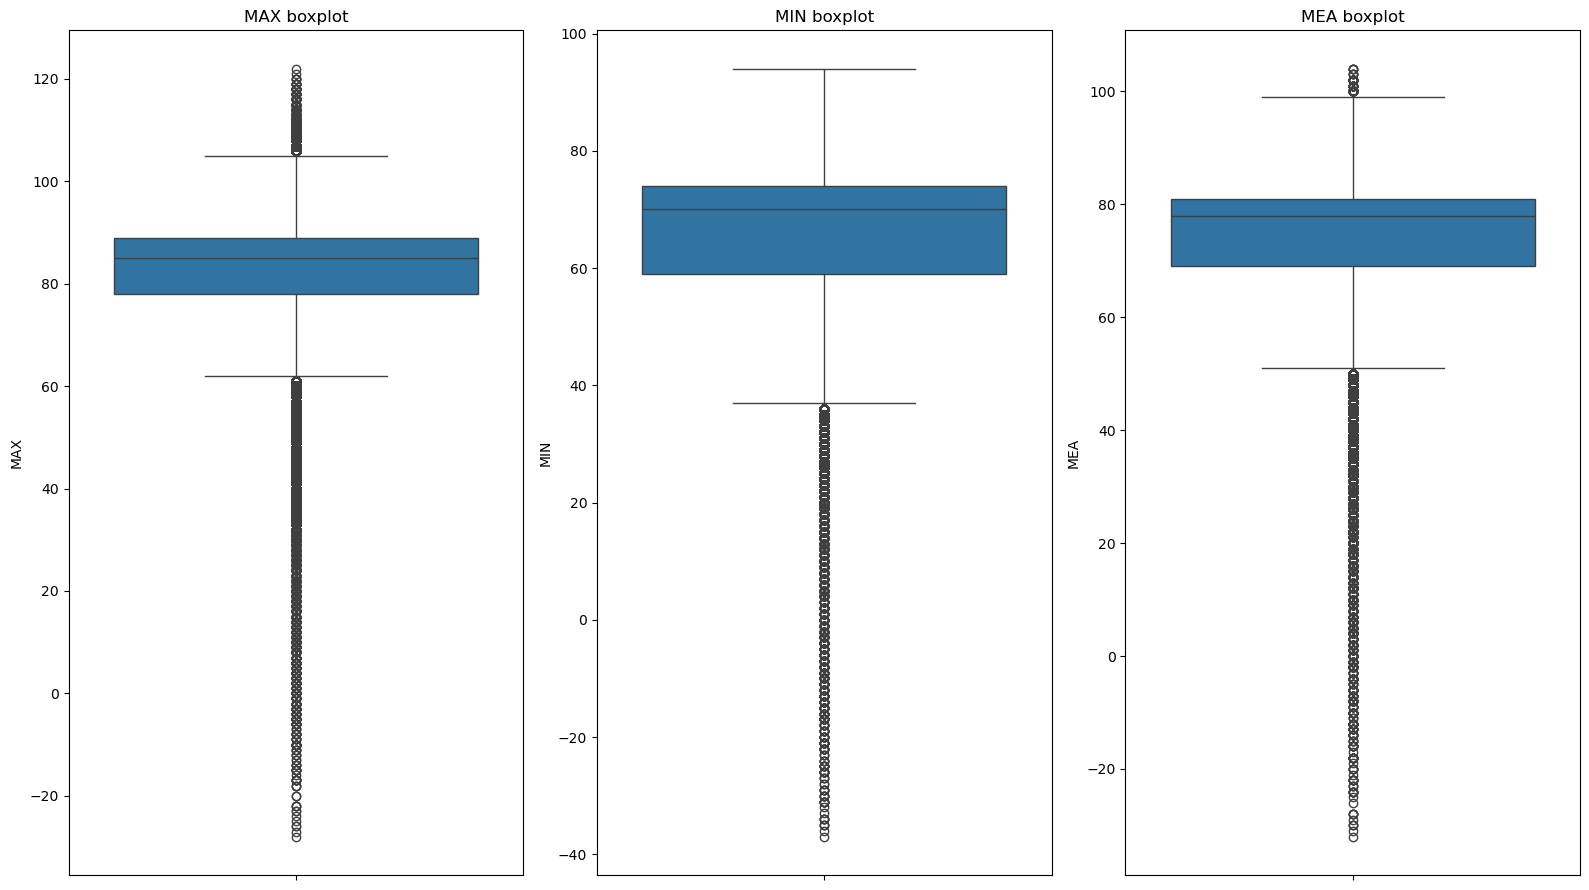

In [14]:
fig, ax = plt.subplots(1,3,figsize=(16,9))
ax = ax.flatten()
for i, col in enumerate(numeric_missing):
    sns.boxplot(
        y=col,
        ax=ax[i],
        data=df
    )
    ax[i].set_title(f"{col} boxplot")

plt.tight_layout()
plt.show()

In [15]:
df[numeric_missing] = df[numeric_missing].fillna(df[numeric_missing].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       119040 non-null  float64       
 12  MIN       119040 non-null  float64       
 13  MEA       119040 non-null  float64       
 14  SNF       117877 non-null  object        
 15  day       119040 non-null  int32         
 16  month     119040 non-null  int32      

In [16]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,day,month,year
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,1,7,1942
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0,2,7,1942
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0,3,7,1942
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0,4,7,1942
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0,5,7,1942


In [17]:
df["Snowfall"] = df["Snowfall"].replace("#VALUE!", np.nan)
df["Snowfall"] = pd.to_numeric(df["Snowfall"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117833 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       119040 non-null  float64       
 12  MIN       119040 non-null  float64       
 13  MEA       119040 non-null  float64       
 14  SNF       117877 non-null  object        
 15  day       119040 non-null  int32         
 16  month     119040 non-null  int32      

In [18]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,day,month,year
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,1,7,1942
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0,2,7,1942
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0,3,7,1942
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0,4,7,1942
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0,5,7,1942


In [19]:
df["Snowfall"].isnull().sum()

1207

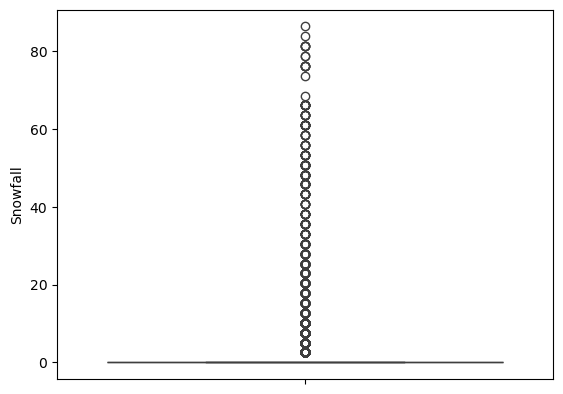

In [20]:
sns.boxplot(df["Snowfall"])
plt.show()

In [21]:
df["Snowfall"] = df["Snowfall"].fillna(df["Snowfall"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       119040 non-null  float64       
 12  MIN       119040 non-null  float64       
 13  MEA       119040 non-null  float64       
 14  SNF       117877 non-null  object        
 15  day       119040 non-null  int32         
 16  month     119040 non-null  int32      

In [22]:
df["Precip"].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [23]:
df["PRCP"].unique()

array(['0.04', '0', '0.1', 'T', '0.14', '0.02', '0.01', '0.07', '0.13',
       '0.03', '0.22', '0.2', '0.08', '1.01', '1.58', '0.75', '0.94',
       '0.16', '0.48', '0.11', '1.31', '0.76', '1.88', '0.25', '0.12',
       '0.33', '0.4', '1.07', '1.2', '1.78', '0.42', '0.61', '2.27',
       '2.29', '0.45', '1.23', '0.7', '1.06', '1.05', '0.26', '0.21',
       '0.19', '0.3', '0.34', '0.31', '0.49', '3.58', '0.53', '0.47',
       '0.23', '0.17', '0.24', '0.36', '0.18', '0.39', '0.38', '0.06',
       '0.55', '0.68', '1.32', '0.05', '0.54', '0.32', '0.88', '1.54',
       '1.42', '3.86', '0.15', '0.59', '3.08', '5.76', '0.58', '0.86',
       '4.76', '1.66', '0.92', '0.83', '1.77', '0.09', nan, '1.97',
       '0.69', '2.01', '0.28', '1', '0.29', '0.64', '1.84', '0.35',
       '0.97', '0.46', '0.67', '5.7', '0.71', '2', '4.19', '1.44', '2.1',
       '1.37', '0.51', '1.04', '3.37', '1.87', '0.5', '0.44', '2.33',
       '1.33', '1.61', '1.11', '0.98', '0.57', '2.82', '4.02', '1.24',
       '1.43',

In [24]:
df["Precip"].value_counts()

Precip
0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

In [25]:
df["PRCP"].value_counts()

PRCP
0       62335
T       16753
0.01     3389
0.02     2909
0.03     2015
        ...  
4.87        1
4.2         1
4.98        1
4.88        1
6.34        1
Name: count, Length: 540, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       119040 non-null  float64       
 12  MIN       119040 non-null  float64       
 13  MEA       119040 non-null  float64       
 14  SNF       117877 non-null  object        
 15  day       119040 non-null  int32         
 16  month     119040 non-null  int32      

In [27]:
df["Precip"] = df["Precip"].replace("T", 0)
df["PRCP"] = df["PRCP"].replace("T", 0)
df["Precip"] = df["Precip"].astype(float)
df["PRCP"] = df["PRCP"].astype(float)
df["PRCP"] = df["PRCP"].fillna(df["PRCP"].mean())

In [28]:
df[["PRCP", "Precip"]].describe()

,PRCP,Precip
count,119040.000000,119040.000000
mean,0.129088,3.225612
std,0.424925,10.801044
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.050000,0.762000
max,12.100000,307.340000


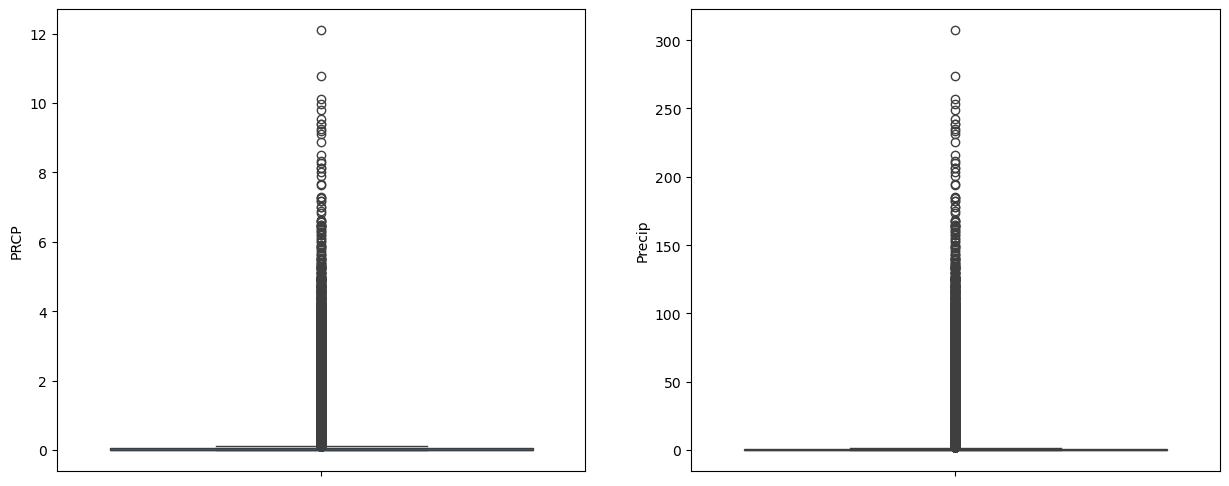

In [29]:
cols = ["PRCP", "Precip"]
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax = ax.flatten()
for i, col in enumerate(cols):
    sns.boxplot(y=col, data=df, ax=ax[i])
plt.show()

These two columns have the same distribution. In other words, they represent the same value with different metrics. So, using only one of them is correct for the model.

In [30]:
df = df.drop("PRCP", axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  MAX       119040 non-null  float64       
 11  MIN       119040 non-null  float64       
 12  MEA       119040 non-null  float64       
 13  SNF       117877 non-null  object        
 14  day       119040 non-null  int32         
 15  month     119040 non-null  int32         
 16  year      119040 non-null  int32      

In [32]:
df["SNF"].unique()

array([0.0, nan, '0', '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3',
       '0.8', '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1',
       '2.3', '2.6', '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2',
       '1.4', '3.1', '1.6', '3.4', '3.3', '2.7', 'T', 0.4, 0.3, 0.6, 0.1,
       0.2, 0.5], dtype=object)

In [33]:
df["Snowfall"].unique()

array([ 0.        ,  0.24554361, 22.86      , 33.02      , 30.48      ,
        2.54      ,  5.08      , 10.16      ,  7.62      , 20.32      ,
       15.24      , 17.78      , 12.7       , 25.4       , 27.94      ,
       43.18      , 38.1       , 45.72      , 53.34      , 58.42      ,
       66.04      , 76.2       , 81.28      , 73.66      , 63.5       ,
       50.8       , 48.26      , 60.96      , 55.88      , 35.56      ,
       78.74      , 40.64      , 86.36      , 83.82      , 68.58      ])

In [34]:
df["SNF"] = df["SNF"].replace("T", 0)
df["SNF"] = df["SNF"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  MAX       119040 non-null  float64       
 11  MIN       119040 non-null  float64       
 12  MEA       119040 non-null  float64       
 13  SNF       117877 non-null  float64       
 14  day       119040 non-null  int32         
 15  month     119040 non-null  int32         
 16  year      119040 non-null  int32      

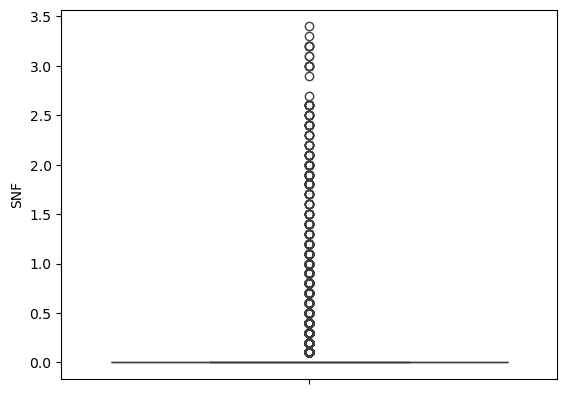

In [35]:
sns.boxplot(y="SNF", data=df)
plt.show()

In [36]:
df["SNF"] = df["SNF"].fillna(df["SNF"].median())
df[["SNF", "Snowfall"]].describe()

,SNF,Snowfall
count,119040.000000,119040.000000
mean,0.009569,0.245544
std,0.102888,2.613250
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3.400000,86.360000


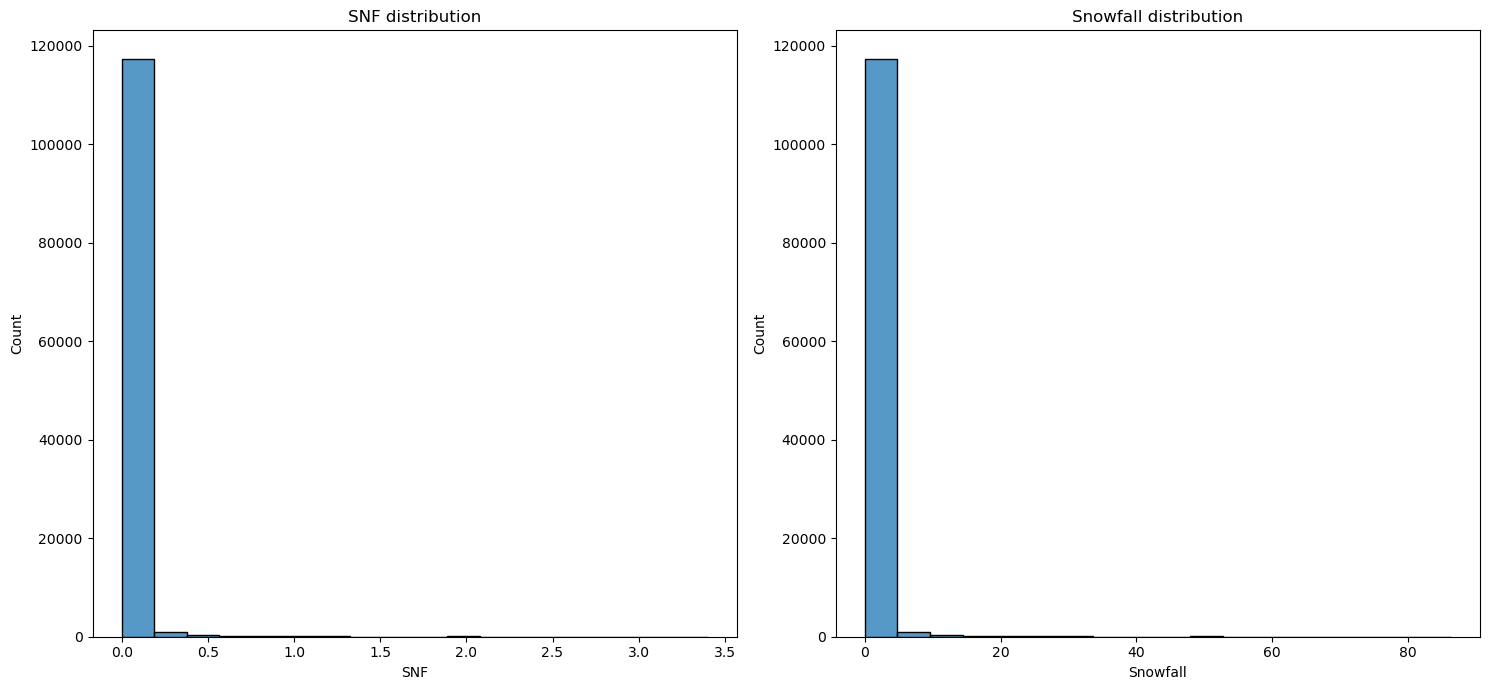

In [37]:
cols2 = ["SNF", "Snowfall"]
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax = ax.flatten()

for i, col in enumerate(cols2):
    sns.histplot(x=col, fill=True, data=df, ax=ax[i])
    ax[i].set_title(f"{col} distribution")

plt.tight_layout()
plt.show()

In [38]:
df[["SNF", "Snowfall"]].corr()

,SNF,Snowfall
SNF,1.000000,0.999956
Snowfall,0.999956,1.000000


This columns have too much correlation and their distributions are same. So, we can drop one of them.

In [39]:
df = df.drop("SNF", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  MAX       119040 non-null  float64       
 11  MIN       119040 non-null  float64       
 12  MEA       119040 non-null  float64       
 13  day       119040 non-null  int32         
 14  month     119040 non-null  int32         
 15  year      119040 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int3

## EDA and Model Building

In [40]:
df.corr()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,day,month,year
STA,1.000000,0.119813,0.013386,0.092371,0.059319,0.078112,-0.058259,0.121408,-0.008592,0.000903,0.083101,0.049732,0.068696,0.000903,-0.008592,0.121408
Date,0.119813,1.000000,0.018515,0.047397,-0.003617,0.023279,-0.012176,0.968056,0.107463,0.011641,0.020999,-0.027151,-0.003020,0.011641,0.107463,0.968056
Precip,0.013386,0.018515,1.000000,0.004457,0.088455,0.047061,-0.011186,0.008951,0.037802,0.000595,0.004301,0.091707,0.049120,0.000595,0.037802,0.008951
MaxTemp,0.092371,0.047397,0.004457,1.000000,0.878384,0.969048,-0.324361,0.039585,0.031346,-0.005130,0.940035,0.818503,0.907613,-0.005130,0.031346,0.039585
MinTemp,0.059319,-0.003617,0.088455,0.878384,1.000000,0.965425,-0.309966,-0.020733,0.069078,-0.002576,0.837411,0.956449,0.924603,-0.002576,0.069078,-0.020733
MeanTemp,0.078112,0.023279,0.047061,0.969048,0.965425,1.000000,-0.325965,0.010681,0.050769,-0.004153,0.914111,0.910013,0.941518,-0.004153,0.050769,0.010681
Snowfall,-0.058259,-0.012176,-0.011186,-0.324361,-0.309966,-0.325965,1.000000,-0.000885,-0.044750,-0.000270,-0.342646,-0.321369,-0.343034,-0.000270,-0.044750,-0.000885
YR,0.121408,0.968056,0.008951,0.039585,-0.020733,0.010681,-0.000885,1.000000,-0.144360,-0.011196,0.012535,-0.045018,-0.016550,-0.011196,-0.144360,1.000000
MO,-0.008592,0.107463,0.037802,0.031346,0.069078,0.050769,-0.044750,-0.144360,1.000000,0.006563,0.034320,0.072372,0.054824,0.006563,1.000000,-0.144360
DA,0.000903,0.011641,0.000595,-0.005130,-0.002576,-0.004153,-0.000270,-0.011196,0.006563,1.000000,-0.003187,-0.000565,-0.001921,1.000000,0.006563,-0.011196


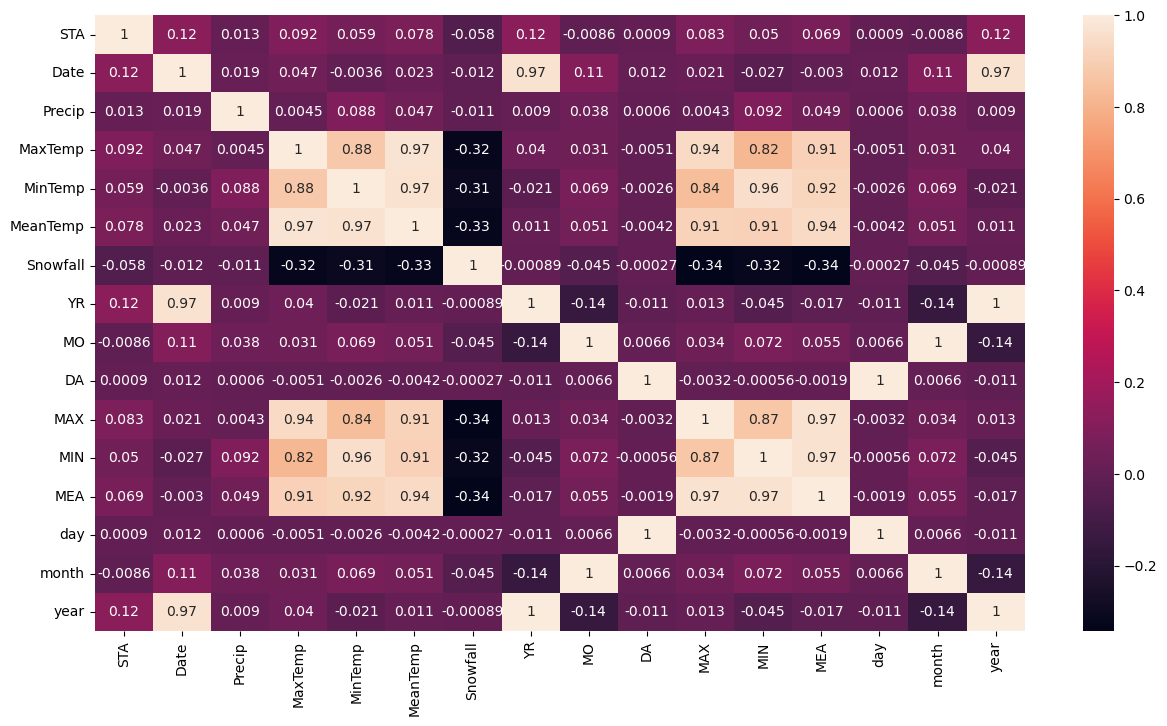

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [43]:
X = df.drop(["day", "month", "year", "Date", "MeanTemp"], axis=1)
y = df["MeanTemp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [44]:
X_train.corr()

,STA,Precip,MaxTemp,MinTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA
STA,1.000000,0.008369,0.092891,0.059433,-0.058673,0.122432,-0.007741,0.000745,0.083966,0.050263,0.069343
Precip,0.008369,1.000000,0.004038,0.087478,-0.010021,0.006503,0.037419,0.000002,0.003982,0.090669,0.048477
MaxTemp,0.092891,0.004038,1.000000,0.879573,-0.325065,0.041294,0.032284,-0.003211,0.942216,0.821014,0.909956
MinTemp,0.059433,0.087478,0.879573,1.000000,-0.309785,-0.018789,0.070288,-0.001080,0.839032,0.957747,0.926076
Snowfall,-0.058673,-0.010021,-0.325065,-0.309785,1.000000,-0.002887,-0.045059,-0.001993,-0.341759,-0.320065,-0.341768
YR,0.122432,0.006503,0.041294,-0.018789,-0.002887,1.000000,-0.144283,-0.009257,0.015162,-0.042575,-0.013955
MO,-0.007741,0.037419,0.032284,0.070288,-0.045059,-0.144283,1.000000,0.008119,0.035649,0.073905,0.056320
DA,0.000745,0.000002,-0.003211,-0.001080,-0.001993,-0.009257,0.008119,1.000000,-0.000765,0.001064,0.000285
MAX,0.083966,0.003982,0.942216,0.839032,-0.341759,0.015162,0.035649,-0.000765,1.000000,0.874318,0.968321
MIN,0.050263,0.090669,0.821014,0.957747,-0.320065,-0.042575,0.073905,0.001064,0.874318,1.000000,0.966810


In [45]:
def drop_cor_cols(df, threshold):
    corr = df.corr()
    cols_to_drop = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                cols_to_drop.add(corr.columns[i])
    return cols_to_drop

dropping_columns = drop_cor_cols(X_train, 0.85)
print(dropping_columns)

{'MinTemp', 'MIN', 'MEA', 'MAX'}


In [46]:
X_train_dropped = X_train.drop(dropping_columns, axis=1)
X_test_dropped = X_test.drop(dropping_columns, axis=1)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler_dropped = StandardScaler()
X_train_dropped_scaled = scaler_dropped.fit_transform(X_train_dropped)
X_test_dropped_scaled = scaler_dropped.transform(X_test_dropped)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models

## Not Dropped Data

MSE:  0.3572248877185779
MAE:  0.05789481796438671
R2 Score:  0.9947990286881797


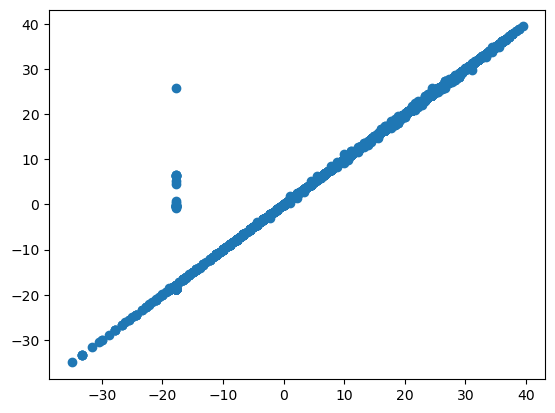

In [49]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  0.35692928056207535
MAE:  0.05972137041687586
R2 Score:  0.9948033325437995


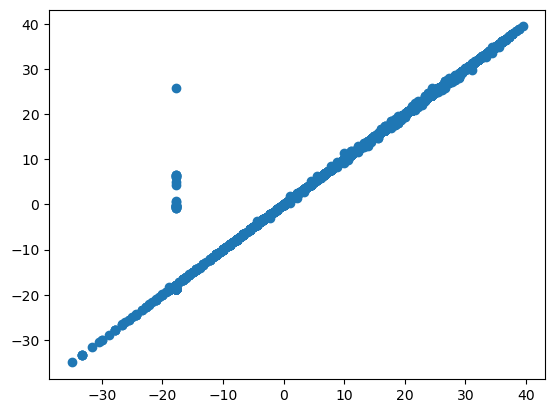

In [50]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  1.478896923646271
MAE:  0.753186657831291
R2 Score:  0.9784681842238185


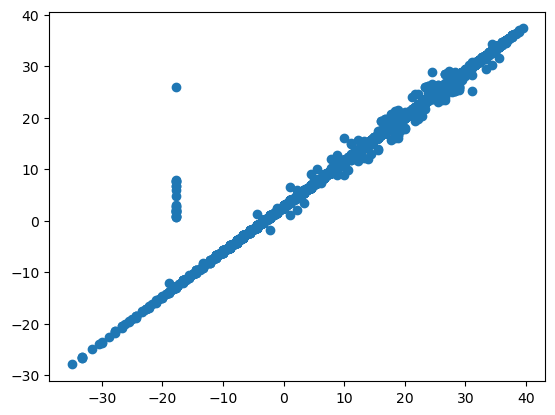

In [51]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  4.179179241704049
MAE:  0.9515588924504109
R2 Score:  0.9391537597453704


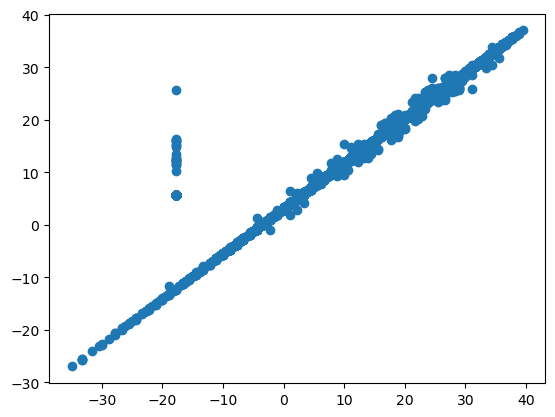

In [52]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

## Dropped Data

MSE:  4.111066086699171
MAE:  1.5219869892143094
R2 Score:  0.940145444751979


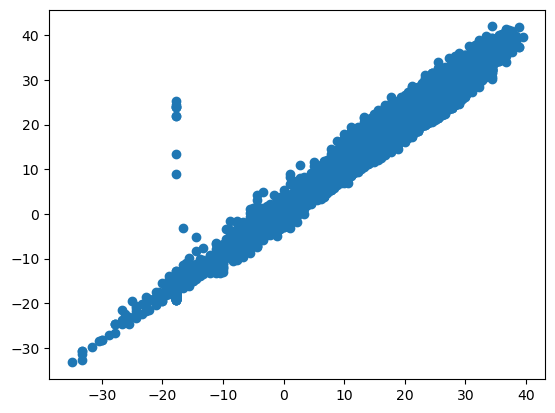

In [53]:
linear = LinearRegression()
linear.fit(X_train_dropped_scaled, y_train)
y_pred = linear.predict(X_test_dropped_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  4.111061719442952
MAE:  1.5219857404466057
R2 Score:  0.9401455083365027


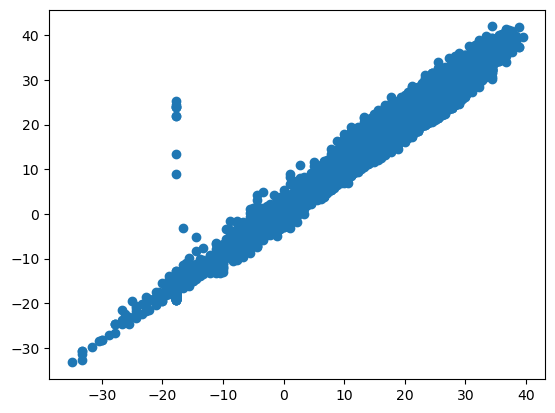

In [54]:
ridge = Ridge()
ridge.fit(X_train_dropped_scaled, y_train)
y_pred = ridge.predict(X_test_dropped_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  5.285571269030569
MAE:  1.7731523692803957
R2 Score:  0.9230453826653133


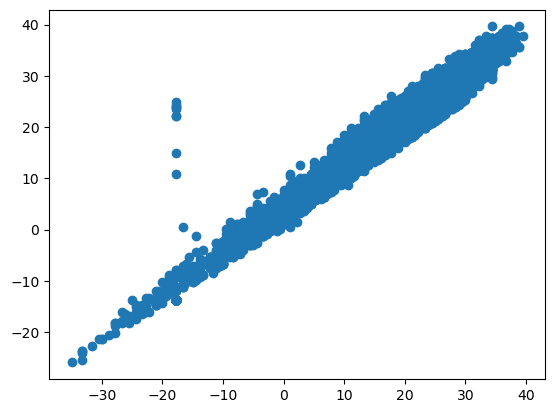

In [55]:
lasso = Lasso()
lasso.fit(X_train_dropped_scaled, y_train)
y_pred = lasso.predict(X_test_dropped_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  13.079892762592056
MAE:  2.7046597712367473
R2 Score:  0.8095649285401418


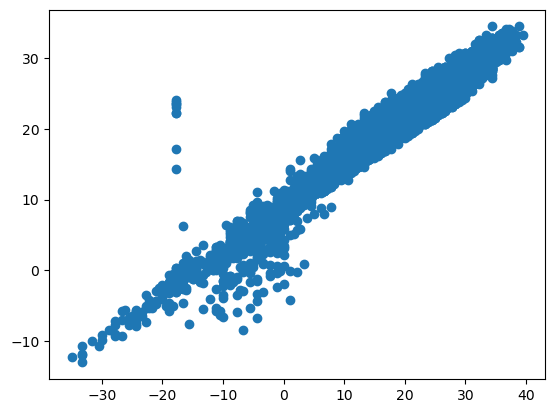

In [56]:
elastic = ElasticNet()
elastic.fit(X_train_dropped_scaled, y_train)
y_pred = elastic.predict(X_test_dropped_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  4.113720068865115
MAE:  1.522256523997493
R2 Score:  0.9401068044288052
0.016094564474070153
[16.09456447 15.0098447  13.9982314  13.05479745 12.1749478  11.35439706
 10.5891487   9.87547552  9.20990152  8.58918499  8.01030266  7.47043507
  6.96695275  6.49740346  6.05950021  5.65111017  5.27024426  4.91504744
  4.58378969  4.27485761  3.98674651  3.71805314  3.4674688   3.23377301
  3.01582753  2.81257085  2.62301299  2.44623069  2.28136293  2.1276067
  1.98421313  1.85048381  1.72576739  1.60945645  1.50098447  1.39982314
  1.30547975  1.21749478  1.13543971  1.05891487  0.98754755  0.92099015
  0.8589185   0.80103027  0.74704351  0.69669528  0.64974035  0.60595002
  0.56511102  0.52702443  0.49150474  0.45837897  0.42748576  0.39867465
  0.37180531  0.34674688  0.3233773   0.30158275  0.28125709  0.2623013
  0.24462307  0.22813629  0.21276067  0.19842131  0.18504838  0.17257674
  0.16094564  0.15009845  0.13998231  0.13054797  0.12174948  0.11354397
  0.10589149  0.09875476  0

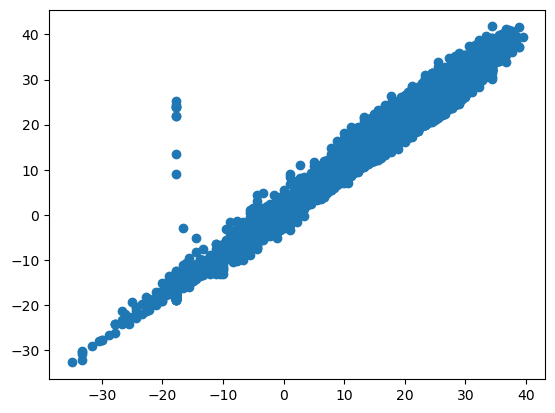

In [57]:
elasticv = ElasticNetCV(cv=5)
elasticv.fit(X_train_dropped_scaled, y_train)
y_pred = elasticv.predict(X_test_dropped_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
print(elasticv.alpha_)
print(elasticv.alphas_)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  4.11127266055943
MAE:  1.5218723070963749
R2 Score:  0.9401424371655596
0.008047282237035077
[8.04728224 7.50492235 6.9991157  6.52739873 6.0874739  5.67719853
 5.29457435 4.93773776 4.60495076 4.29459249 4.00515133 3.73521754
 3.48347638 3.24870173 3.0297501  2.82555509 2.63512213 2.45752372
 2.29189485 2.1374288  1.99337326 1.85902657 1.7337344  1.61688651
 1.50791377 1.40628543 1.31150649 1.22311535 1.14068147 1.06380335
 0.99210657 0.9252419  0.8628837  0.80472822 0.75049223 0.69991157
 0.65273987 0.60874739 0.56771985 0.52945744 0.49377378 0.46049508
 0.42945925 0.40051513 0.37352175 0.34834764 0.32487017 0.30297501
 0.28255551 0.26351221 0.24575237 0.22918948 0.21374288 0.19933733
 0.18590266 0.17337344 0.16168865 0.15079138 0.14062854 0.13115065
 0.12231153 0.11406815 0.10638034 0.09921066 0.09252419 0.08628837
 0.08047282 0.07504922 0.06999116 0.06527399 0.06087474 0.05677199
 0.05294574 0.04937738 0.04604951 0.04294592 0.04005151 0.03735218
 0.03483476 0.03248702 0.03029

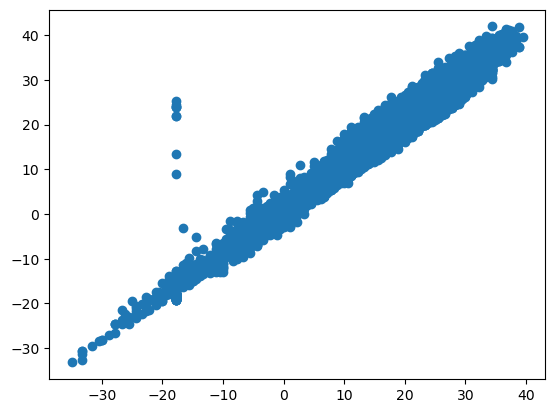

In [58]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_dropped_scaled, y_train)
y_pred = lassocv.predict(X_test_dropped_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
print(lassocv.alpha_)
print(lassocv.alphas_)
plt.scatter(y_test, y_pred)
plt.show()

MSE:  4.111065649149432
MAE:  1.5219868643357946
R2 Score:  0.94014545112243
0.1


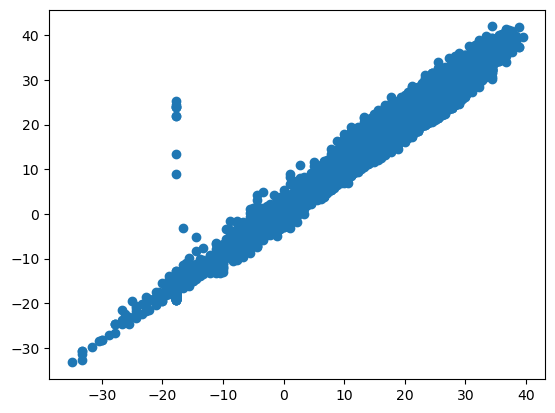

In [61]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_dropped_scaled, y_train)
y_pred = ridgecv.predict(X_test_dropped_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", score)
print(ridgecv.alpha_)
plt.scatter(y_test, y_pred)
plt.show()

I chose ElasticNetCV here. Because with L1 and L2 regularization, our model becomes more simpler and reduces the risk of overfitting. 